# COGS 108 - Final Project 

# Overview

 My project aims to analyze the relationship between traffic density surrounding San Diego parks and how nearby traffic may influence the parks' Yelp review scores. I looked at a dataset of Yelp reviews by park and a dataset of traffic density by zip code, and analyzed whether or not an increased traffic density in the zip code of a park had any impact on the average rating of parks within that zip code. The data seems to suggest that nearby traffic density has a negative correlation with Yelp review scores for San Diego parks.

# Name & GitHub ID

- Name: Samuel Martinelli (A15936045)
- GitHub Username: skmartinelli

# Research Question

What is the relationship between area traffic density and Yelp ratings of San Diego parks?

## Background and Prior Work

The nonstop sounds and stresses of city traffic can pay a toll on psychological health. A study by the German university Essen University Hospital found that continued exposure to residential traffic noise correlated with the development of depressive symptoms, and a New York Times article detailed traffic's effects on psychological well being, noting increased feelings of helplessness and loss of control felt by drivers stuck in traffic.
    


Yelp is a service that allows users to write reviews for locations they visit to log their experience. As we know, traffic can have a major impact on people's moods, and may affect the Yelp reviews vistitors leave for San Diego parks. Were they stuck in traffic for longer than they expected, unable to find parking, or simply annoyed by the constant sounds of cars and idle engines when they wanted some tranquility, visitors may be inclined to leave a more negative review the higher the traffic density in the surrounding area. My project looks at how the two are correlated, and aims to see if higher traffic density has a significant impact on parks' Yelp reviews. 
    

References:
- 1)https://ehp.niehs.nih.gov/doi/10.1289/ehp.1409400
- 2) https://www.nytimes.com/2019/01/21/upshot/stuck-and-stressed-the-health-costs-of-traffic.html

# Hypothesis


I hypothesize that higher traffic density in the area surrounding San Diego parks would decrease the average Yelp review score. The frustration of being stuck in traffic and the increased volume of residential traffic sounds that come with higher traffic density would likely negatively impact park visitors' moods, leading them to leave more negative Yelp reviews. With lower traffic density, people would be better able to escape the traffic of regular life and leave better reviews as a result.

# Dataset(s)

- Dataset Name: California Environmental Health Screening Data
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 833

This dataset contains environmental information for zip codes across California Counties. The main one analyzed in this project was traffic density by zip code, which was measured in vehicle-kilometers per hour per road length within 150 meters of each census tract boundary.




- Dataset Name: yelp_SD_parks
- Link to the dataset: (This one was curated by Professor Ellis but here is the link provided) https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 833 

This dataset contains Yelp information about parks in San Diego, such as the average Yelp rating, number of ratings, and address, including zip code.  


I will combine these datasets by merging the entries that have a common zip code in the 2 datasets. I'll be averaging the results of the traffic density and park reviews by zip code because I don't believe there's an efficient way to get any more accurate within the timeframe of the individual project. It would be neat, I just don't have enough time to go district by district or make some crazy webscraper :(

# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm


# Reading in CSV's
df_parks = pd.read_csv('yelp_SD_parks.csv')
df_traffic = pd.read_csv('calenviroscreen-final-report.csv')

# Example of what the traffic dataframe looks like before cleaning. Yuck
df_traffic.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Clearing unnecessary columns by getting only the columns needed
df_traffic = df_traffic[['California County','Location 1', 'Traffic']]
df_parks = df_parks[['address', 'rating']]

# Dropping rows with empty values to be safe
df_traffic = df_traffic.dropna()
df_parks = df_parks.dropna()

# Removing full addresses from parks and just getting zip codes
for i in range(0, len(df_parks)):
    if (i in df_parks.index):
        address_park = df_parks.loc[i,'address']
        zipCode = address_park[-5:]
        df_parks['address'] = df_parks['address'].replace([address_park],zipCode)
        
# Renaming address to zip for clarity
df_parks.rename(columns = {'address':'zip'}, inplace = True) 



# Getting traffic zip codes
sep = '\n'
for i in range(0, len(df_traffic)):
    if (i in df_traffic.index):
        
        # Removing non-San Diego data because traffic data was California-wide
        city = df_traffic.loc[i,'California County']
        if (city != "San Diego"):
            df_traffic = df_traffic.drop(i)
            continue
        
        
        # Replacing the full address with just the extracted zip code
        text = df_traffic.loc[i,'Location 1']
        stripped = text.split(sep, 1)[0]
        stripped = stripped[-5:]
        df_traffic['Location 1'] = df_traffic['Location 1'].replace([text],stripped)
        
        
# Dropping county column after getting only San Diego, renaming location column to zip
df_traffic = df_traffic[['Location 1', 'Traffic']]
df_traffic.rename(columns = {'Location 1':'zip'}, inplace = True) 

# Getting mean of traffic density by zip code 
df_traffic = df_traffic.groupby('zip').mean().reset_index()
df_traffic.head()

# Getting mean of park yelp rating by zip code
df_parks = df_parks.groupby('zip').mean().reset_index()
df_parks.head()

# Merging dataframes together for shared zip codes
df = df_traffic.merge(df_parks)


# Final merged dataframe with average ratings and average traffic density
df.head()

,zip,Traffic,rating
0,91902,1922.012046,4.125
1,91910,1774.441749,4.000
2,91911,1609.853055,1.000
3,91913,856.769123,3.000
4,91914,330.677791,4.000


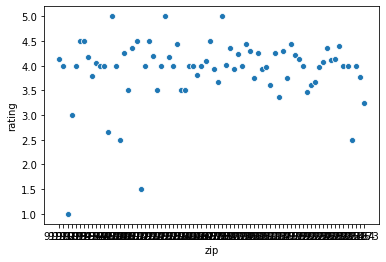

In [3]:
# Graph zip and average park rating, grouped by zip code
sns.scatterplot(x=df['zip'], y=df['rating'])



Shows that Yelp reviews tend to be pretty even across zip codes. Don't worry about zip codes being unreadable... Consider it a privacy thing

# Data Analysis & Results

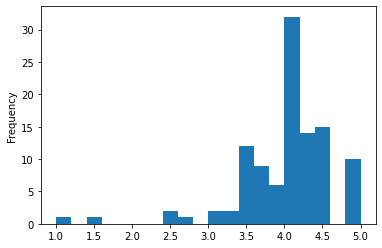

In [4]:
# Plot the distribution of yelp ratings
rating_plot = df_parks['rating'].plot.hist(bins = 20)

Most ratings for San Diego parks seem to be around 4 to 5 stars. Must be a nice area, would love to live there

Text(0, 0.5, 'Yelp Rating')

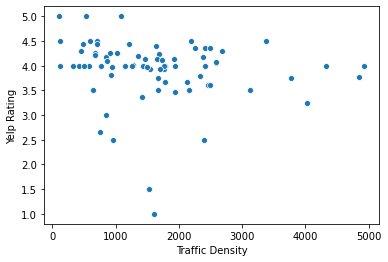

In [8]:
# Graph the rating as the x-axis and traffic density as the y-axis
sns.scatterplot(x = df['Traffic'], y = df['rating'], data = df)

plt.xlabel('Traffic Density')
plt.ylabel('Yelp Rating')

There isn't a clear trend here on whether or not increased traffic density leads to decreased rating.

# Linear Regression Model :)

In [9]:
# Using linear regression to test for a relationship

# Create the model
outcome, predictors = patsy.dmatrices('rating ~ Traffic', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.490
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.226
Time:                        23:05:57   Log-Likelihood:                -73.102
No. Observations:                  76   AIC:                             150.2
Df Residuals:                      74   BIC:                             154.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0600      0.138     29.450      0.0

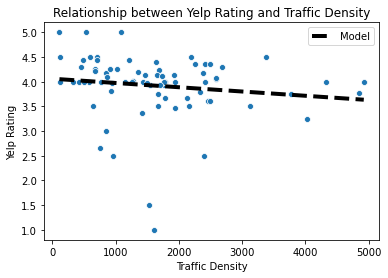

In [10]:
# Plot original data again
sns.scatterplot(x='Traffic', y='rating', data=df)

# Plot fit line on top of it
xs = np.arange(df['Traffic'].min(), df['Traffic'].max())
ys = -0.00008637 * xs + 4.06
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Traffic Density')
plt.ylabel('Yelp Rating')
plt.title('Relationship between Yelp Rating and Traffic Density')
plt.legend();

The results of the linear regression model indicate a slight negative relationship between traffic density and Yelp ratings. As the traffic density increases, the model would expect a lower Yelp review.

# Ethics & Privacy

I don't believe there are any ethical issues with the datasets used because they were given by Professor Ellis and are openly available on the internet. I think there could be a potential privacy issue with some of the Yelp reviews for parks that were less reviewed (Some of the parks in the yelp_SD_Parks dataset had only 1 or 2 total reviews), but the reviews were anonymized in the dataset so I think it's more Yelp's concern than mine.

Another potential ethical concern in my project is that the analysis doesn't take into account the environmental effects that higher traffic density could have on an area (and the resultant impact on park reviews from the environmental damage). With more time I think there could be a deeper look into how traffic density, air quality, and park reviews could paint a clearer picture of which communities need assistance from the city and in what way, but that wouldn't be in the scope of this project. 

# Conclusion & Discussion

By comparing the average Yelp reviews to average Traffic Density across zip codes in San Diego, I hypothesized that increased traffic density in the area would lead to lower Yelp reviews for parks. After cleaning and analyzing the data, I found there to be a slight correlation, showing my hypothesis to be correct, but maybe not as dramatic a correlation as I'd hoped. Perhaps parks with high surrounding traffic density  wishing to increase their Yelp reviews could look into measures reducing noise pollution like outdoor sound absorbing panels. 

I briefly discussed previously that a major limitation of my project was that I had to sort my dataset by zip code and couldn't go all the way down to be as precise at the level of the census tract. Additionally, I think my results may be more indicative of other factors that simply happen to correlate with traffic density, such as air quality or even noise pollution at the most basic level. More data would need to be collected to come up with a real reason as to why the parks in areas with higher traffic density tend to have lower Yelp reviews. Mainly, I would've liked to go park by park and look at the data by census tract instead of having to go by zip code, but was too limited by time.